In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
TEST_PATH = '/home/nick/Desktop/experiments_results/milan_processed_test.npz'
RESULTS_PATH = '/home/nick/Desktop/experiments_results/'
cnn_3d =  'cnn_3d_lr_-3_in_12_out_10_with_relu/'
deep_conv_lstm = 'new_conv_lstm_lr_-3_in12_out10_no_shuffle_before_split/'
shallow_conv_lstm = 'conv_lstm_lr_-3_in12_out10_no_shuffle_before_split/'
predrnn_pp = 'pred_rnn_pp_less_mem_lr-3_grad_clip_10/'
predrnn_full = 'pred_rnn_pp_less_mem_lr-3_more_epochs/'
PREDICTIONS_PATH = 'example_predictions/test_predictions.npz'
x = np.load(TEST_PATH)['x']
y = np.load(TEST_PATH)['y']

pred_cnn = np.load(RESULTS_PATH+cnn_3d+PREDICTIONS_PATH)['y']
pred_deep = np.load(RESULTS_PATH+deep_conv_lstm+PREDICTIONS_PATH)['y']
pred_shallow = np.load(RESULTS_PATH+shallow_conv_lstm+PREDICTIONS_PATH)['y']
pred_pred_rnn = np.load(RESULTS_PATH+predrnn_pp+PREDICTIONS_PATH)['y']
pred_pred_rnn_full = np.load(RESULTS_PATH+predrnn_full+PREDICTIONS_PATH)['y']

In [4]:
pred_deep = pred_deep.transpose(0,1,3,4,2)
pred_deep = pred_deep.reshape([-1,100,100,10])

pred_shallow = pred_shallow.transpose(0,1,3,4,2)
pred_shallow = pred_shallow.reshape([-1,100,100,10])

pred_cnn = pred_cnn.transpose(0,1,3,4,2)
pred_cnn = pred_cnn.reshape([-1,100,100,10])

pred_pred_rnn = pred_pred_rnn.transpose(0,1,3,4,2)
pred_pred_rnn = pred_pred_rnn.reshape([-1,100,100,10])

pred_pred_rnn_full = pred_pred_rnn_full.transpose(0,1,3,4,2)
pred_pred_rnn_full = pred_pred_rnn_full.reshape([-1,100,100,10])

In [5]:
MSE_deep = ((y - pred_deep)**2).sum(axis = (1,2)).mean()
MSE_shallow = ((y - pred_shallow)**2).sum(axis = (1,2)).mean()
MSE_cnn = ((y - pred_cnn)**2).sum(axis = (1,2)).mean()
MSE_pred_rnn = ((y - pred_pred_rnn)**2).sum(axis = (1,2)).mean()
MSE_pred_rnn_full = ((y - pred_pred_rnn_full)**2).sum(axis = (1,2)).mean()

In [6]:
print(MSE_deep)
print(MSE_shallow)
print(MSE_cnn)
print(MSE_pred_rnn)
print(MSE_pred_rnn_full)

360.7426764464058
356.1074240177909
418.009391382913
277.19292433095256
181.90093040555917


### SSIM / PSNR

In [32]:
from skimage import measure 

tot = 0
SSIM_deep = 0
SSIM_shallow = 0
SSIM_cnn = 0
SSIM_pred_rnn = 0
PSNR_deep = 0
PSNR_shallow = 0
PSNR_cnn = 0
PSNR_pred_rnn = 0
for i in range(y.shape[0]):
    for j in range(y.shape[1]):
        tot+=1
        SSIM_deep += measure.compare_ssim(y[i,j,...],pred_deep[i,j,...])
        SSIM_shallow += measure.compare_ssim(y[i,j,...],pred_shallow[i,j,...])
        SSIM_cnn += measure.compare_ssim(y[i,j,...],pred_cnn[i,j,...])
        SSIM_pred_rnn += measure.compare_ssim(y[i,j,...],pred_pred_rnn_full[i,j,...])
        
#         PSNR_deep += measure.compare_psnr(y[i,j,...],pred_deep[i,j,...],data_range=37)
#         PSNR_pred_rnn += measure.compare_psnr(y[i,j,...],pred_pred_rnn_full[i,j,...],data_range=37)
        PSNR_deep += measure.compare_psnr(y[i,j,...],pred_deep[i,j,...],data_range=37)
        PSNR_shallow += measure.compare_psnr(y[i,j,...],pred_shallow[i,j,...],data_range=37)
        PSNR_cnn += measure.compare_psnr(y[i,j,...],pred_cnn[i,j,...],data_range=37)
        PSNR_pred_rnn += measure.compare_psnr(y[i,j,...],pred_pred_rnn_full[i,j,...],data_range=37)


In [33]:
print(SSIM_deep / tot)
print(SSIM_shallow / tot)
print(SSIM_cnn /tot)
print(SSIM_pred_rnn / tot)

print(PSNR_deep / tot)
print(PSNR_shallow / tot)
print(PSNR_cnn /tot)
print(PSNR_pred_rnn / tot)

0.7822024646793385
0.7618011762155833
0.7237272245365245
0.8138058168408593
52.652637585267435
51.6329739909239
51.198260067517374
53.30160312608229


In [221]:
def plot_single_prediction_example_on_cell_58_50_with_input(index):
    x_axis = np.arange(22)
    coords = (58,50)
    
    input_ = x[index,coords[0],coords[1],:]
    y_ = np.concatenate((input_,y[index,coords[0],coords[1],:]))
    pred_shallow_ = np.concatenate((input_,pred_shallow[index,coords[0],coords[1],:]))
    pred_deep_ = np.concatenate((input_,pred_deep[index,coords[0],coords[1],:]))
    pred_cnn_ = np.concatenate((input_,pred_cnn[index,coords[0],coords[1],:]))
    pred_pred_rnn_ = np.concatenate((input_,pred_pred_rnn[index,coords[0],coords[1],:]))
    pred_pred_rnn_full_ = np.concatenate((input_,pred_pred_rnn_full[index,coords[0],coords[1],:]))
    plt.plot(x_axis,pred_shallow_,'k-o',label='shallow')
    plt.plot(x_axis,pred_deep_,'k--o',label='deep')
    plt.plot(x_axis,pred_cnn_,'r-o',label='3D CNN')
    plt.plot(x_axis,pred_pred_rnn_,'g--o',label='PredRNN++')
    plt.plot(x_axis,pred_pred_rnn_full_,'g-o',label='PredRNN++ full training ')
    plt.plot(x_axis,y_,'b-o',label='ground_truth')
    
    
    
    plt.legend()

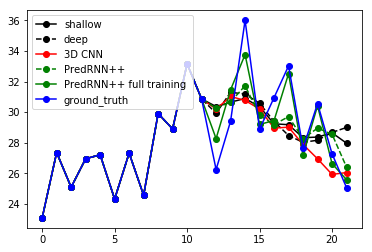

In [222]:
plot_single_prediction_example_on_cell_58_50_with_input(99)

In [34]:
def plot_single_prediction_example_on_cell_50_50(index):
    x_axis = np.arange(10)
    plt.plot(x_axis,y[index,50,50,:],'b-o',label='ground_truth')
#     plt.plot(x_axis,pred_shallow[index,50,50,:],'k-o',label='shallow conv lstm')
#     plt.plot(x_axis,pred_deep[index,50,50,:],'k--o',label='deep')
#     plt.plot(x_axis,pred_cnn[index,50,50,:],'r-o',label='3D CNN')
    plt.plot(x_axis,pred_pred_rnn[index,50,50,:],'g--o',label='PredRNN++')
    plt.plot(x_axis,pred_pred_rnn_full[index,50,50,:],'g-o',label='PredRNN++_full')
    plt.legend()

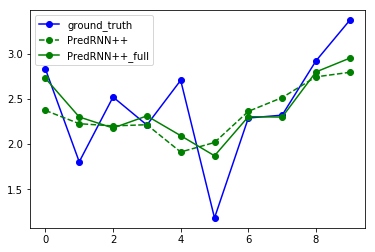

In [35]:
plot_single_prediction_example_on_cell_50_50(89)

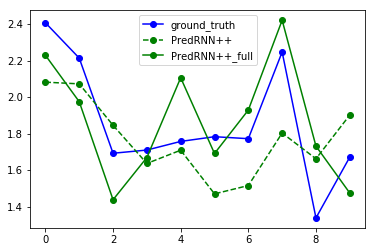

In [36]:
plot_single_prediction_example_on_cell_50_50(140)

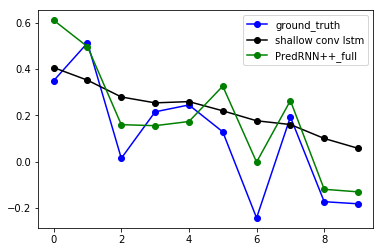

In [154]:
plot_single_prediction_example_on_cell_50_50(180)

#### visualizing full predictions 

In [181]:
from matplotlib.colors import Normalize

norm = Normalize(vmin=0,vmax=30)
cmap = 'nipy_spectral'
# plt.figure(figsize=(20,10))
# plt.imshow(raw[...,0],origin='lower',norm=norm,cmap=cmap)
# plt.title('Plot of data traffic on Milano grid at t=0',fontsize=16)
# plt.xlabel('x coordinate',fontsize=16)
# plt.ylabel('y coordinate',fontsize=16)
# plt.colorbar()
# plt.savefig('one_timestep_visualisation.pdf')

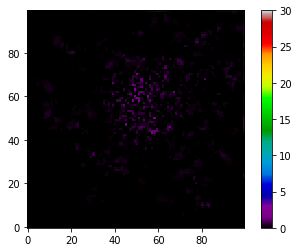

In [182]:
coords = (58,50)
index = 99

gt_ = y[index,:,:,0]
pp_ = pred_pred_rnn_full[index,:,:,0]
cc_ = pred_shallow[index,:,:,0]
plt.imshow(gt_ - pp_,origin='lower',norm=norm,cmap=cmap)


plt.colorbar()


## Learning Curves 

In [203]:
val_plotter = pd.DataFrame()

In [204]:
predrnn_curve = pd.read_csv(RESULTS_PATH+predrnn_pp+'result_outputs/summary.csv')
shallow_convlstm_curve = pd.read_csv(RESULTS_PATH+shallow_conv_lstm+'result_outputs/summary.csv')
deep_convlstm_curve = pd.read_csv(RESULTS_PATH+deep_conv_lstm+'result_outputs/summary.csv')
cnn_curve = pd.read_csv(RESULTS_PATH+cnn_3d+'result_outputs/summary.csv')

In [218]:
# plotter['predrnn_train'] = pd.read_csv(RESULTS_PATH+predrnn_pp+'result_outputs/summary.csv')['train_loss'][:100]
val_plotter['PredRNN++'] = pd.read_csv(RESULTS_PATH+predrnn_pp+'result_outputs/summary.csv')['val_loss']
# plotter['convlstm_train'] = pd.read_csv(RESULTS_PATH+shallow_conv_lstm+'result_outputs/summary.csv')['train_loss'][:100]
val_plotter['Shallow ConvLSTM'] = pd.read_csv(RESULTS_PATH+shallow_conv_lstm+'result_outputs/summary.csv')['val_loss']#[:100]
val_plotter['Deep ConvLSTM'] = pd.read_csv(RESULTS_PATH+deep_conv_lstm+'result_outputs/summary.csv')['val_loss']#[:100]
val_plotter['3D CNN'] = pd.read_csv(RESULTS_PATH+cnn_3d+'result_outputs/summary.csv')['val_loss']#[:100]

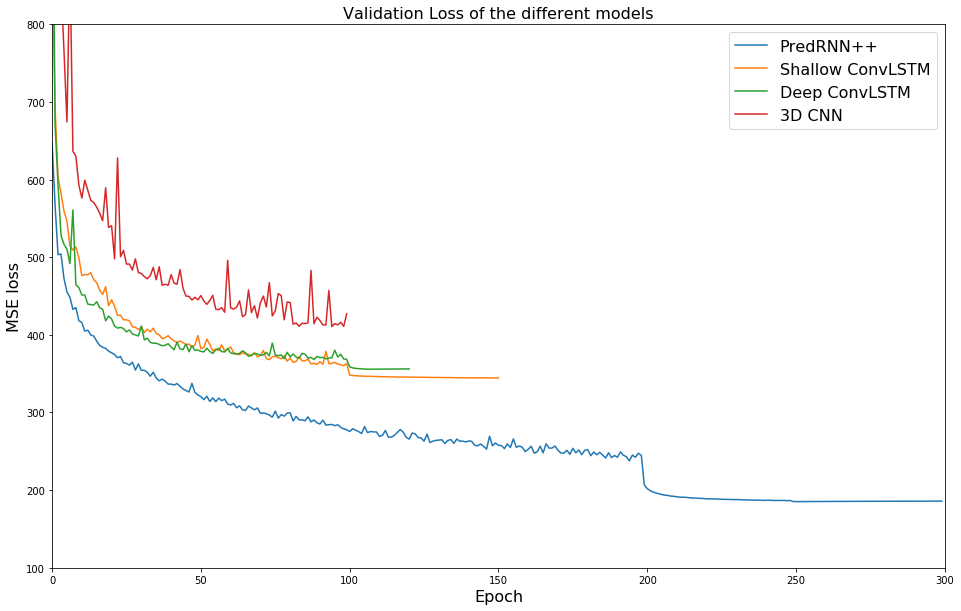

In [220]:
ax = val_plotter.plot(figsize=(16,10))
ax.set_ylim(100,800)
ax.set_xlim(0,300)
ax.set_title('Validation Loss of the different models',fontsize=16)
ax.set_ylabel('MSE loss',fontsize=16)
ax.set_xlabel('Epoch',fontsize=16)
ax.legend(prop={'size':16})
fig = ax.get_figure()
fig.savefig('Validation Curve.pdf')

In [37]:
import torch

In [39]:
import sys
sys.path.append('../')

In [58]:
from model_architectures.conv_lstm_shallow.ShallowConvLstm import ConvLSTMModel
from model_architectures.pred_rnn_pp.PredRNNPP_less_mem import PredRNNPP
from model_architectures.conv_lstm_deep.DeepConvLstm import EF,Encoder,Forecaster,ConvLSTM
from model_architectures.conv_lstm_deep.architecture_specifications import encoder_architecture, forecaster_architecture
###### Define encoder #####

enc_arch = encoder_architecture(args.batch_size, device, args.seq_start)
encoder = Encoder(enc_arch[0],enc_arch[1]).to(device)

###### Define decoder #####
seq_output = 10

fore_arch = forecaster_architecture(arg.batch_size, device, seq_output)

forecaster=Forecaster(fore_arch[0],fore_arch[1],seq_output).to(device)

deep_model = EF(encoder,forecaster)

NameError: name 'args' is not defined

In [53]:
shallow_model = ConvLSTMModel(100,12,10,5,True)
pred_rnn_pp_model = PredRNNPP([5,12,100,100],12,10,5,[64,64,64,64],'cpu')

In [56]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(count_parameters(shallow_model))
print(count_parameters(pred_rnn_pp_model))

463697
2468433
